<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project4-MonReader/mllm_gpt4_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image

image_path = Image.open("/content/drive/MyDrive/Apziva/4th_MonReader/monreader_images/images/testing/notflip/0001_000000002.jpg").convert("RGB")

### GPT-4 - separating each tasks

##### package installation

In [4]:
!pip install openai==0.28.0
# for text extraction

In [6]:
import openai
print(openai.__version__)

0.28.0


In [17]:
!pip uninstall -y openai

Found existing installation: openai 1.13.3
Uninstalling openai-1.13.3:
  Successfully uninstalled openai-1.13.3


In [3]:
!pip install --upgrade --no-cache-dir openai --quiet openai==1.13.3

# for audio

In [4]:
import openai
print(openai.__version__)

1.13.3


In [7]:
!pip uninstall -y openai httpx

Found existing installation: openai 1.13.3
Uninstalling openai-1.13.3:
  Successfully uninstalled openai-1.13.3
Found existing installation: httpx 0.28.1
Uninstalling httpx-0.28.1:
  Successfully uninstalled httpx-0.28.1


In [8]:
!pip install --no-cache-dir openai==1.13.3 httpx==0.27.0

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227.4/227.4 kB 8.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.6/75.6 kB 260.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1, but you have httpx 0.27.0 which is incompatible.
google-genai 1.21.1 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.0 which is incompatible.


In [5]:
from google.colab import userdata
import openai
import base64

api_key = userdata.get('openai_api')
openai.api_key = api_key

#### Sample data

##### OCR

In [7]:
import openai
import base64
from PIL import Image
import os

def extract_text_from_image(image_path, prompt="Extract all visible text from this image. Return only raw text, no explanation."):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # image encoding
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")

    # Calling OpenAI Vision API
    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
                ]
            }
        ],
        max_tokens=1000,
    )

    # Parsing response
    result = response["choices"][0]["message"]["content"]
    return result

In [8]:
sample_korean_path = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/sample_image_01.png"
sample_english_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

output_text = extract_text_from_image(sample_korean_path)
output_text2 = extract_text_from_image(sample_english_path)

print("OCR Korean Result:\n", output_text)
print("OCR English Result:\n", output_text2)

OCR Korean Result:
 Sample OCR Image

Ïò® Í∞ÄÏ°±Ïù¥ Ìï®Íªò Ï¶êÍ∏∞Îäî
Ïñ¥Î¶∞Ïù¥
ÏÑúÏª§Ïä§ ÎßàÏà†Ïáº

12.25 ÏàòÏöîÏùº
OCR English Result:
 THE GODS NEED A HERO  
IMMORTALS


##### Image data sample - kor, eng

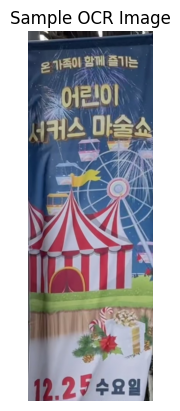

In [9]:
from PIL import Image
import io
import matplotlib.pyplot as plt


import pandas as pd
from IPython.display import display
from IPython import get_ipython


train_parquet_file = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/train-00000-of-00002.parquet"
df_train_parquet = pd.read_parquet(train_parquet_file)

# print(df_train_parquet.shape)
# display(df_train_parquet.head(5))

# 1st image as a sample
image_bytes = df_train_parquet.iloc[0]["image"]["bytes"]
sample_image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

# print matplotlib
plt.imshow(sample_image)
plt.axis("off")  # No axis show
plt.title("Sample OCR Image")
plt.show()

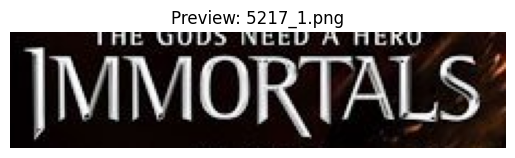

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï
sample_english_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

# Ïù¥ÎØ∏ÏßÄ Ïó¥Í∏∞
english_sample_image = Image.open(sample_english_image_path)

# Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.imshow(english_sample_image)
plt.axis("off")  # Ï∂ï Ïà®Í∏∞Í∏∞
plt.title("Preview: 5217_1.png")
plt.show()

##### TTS

In [6]:
from IPython.display import Audio

# Ïò§ÎîîÏò§ ÏÉùÏÑ±
response = openai.audio.speech.create(
    model="tts-1",  # "tts-1-hd"
    voice="nova",   # Eng: nova, shimmer / Kor: alloy, echo Îì±
    input=output_text
)

# ÌååÏùºÎ°ú
with open("output_ocr_speech.mp3", "wb") as f:
    f.write(response.content)

# ‚úÖ ColabÏóêÏÑú Ïû¨ÏÉù
Audio("output_ocr_speech.mp3")

NameError: name 'output_text' is not defined

I tried running the full OCR-to-TTS pipeline using the OpenAI API on Colab. While the OCR part with GPT-4o worked well, I ran into repeated issues with the TTS part. Installing the right version of the `openai` package (>=1.13.3) and aligning dependencies like `httpx` kept crashing my Colab session or corrupting the environment.

### GPT-4 the whole pipeline

#### Sample data

In [11]:
from google.colab import userdata
import openai
import base64

api_key = userdata.get('openai_api')
openai.api_key = api_key

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
sample_english_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

# Ïù¥ÎØ∏ÏßÄ base64 Ïù∏ÏΩîÎî©
with open(sample_english_image_path, "rb") as f:
    b64_image = base64.b64encode(f.read()).decode("utf-8")

# GPT-4oÎ°ú Ïù¥ÎØ∏ÏßÄ ‚Üí ÌÖçÏä§Ìä∏ ‚Üí ÏùåÏÑ± ÏöîÏ≤≠ (textÍπåÏßÄ Î®ºÏ†Ä ÏàòÌñâ)
ocr_response = openai.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Please extract all visible text from this image."},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{b64_image}"}}
            ]
        }
    ]
)
eng_sample_text = ocr_response.choices[0].message.content
print("üß† OCR Result:\n", eng_sample_text)

# Ïù¥Ïñ¥ÏÑú TTS ÏöîÏ≤≠
tts_response = openai.audio.speech.create(
    model="tts-1",
    voice="nova",  # or "alloy" for Korean
    input=eng_sample_text
)


eng_output_path = "/content/drive/MyDrive/Apziva/4th_MonReader/gpt4_eng_sample_output.mp3"
with open(eng_output_path, "wb") as f:
    f.write(tts_response.content)


from IPython.display import Audio
Audio(eng_output_path)

üß† OCR Result:
 THE GODS NEED A HERO  
IMMORTALS


#### the original data

In [13]:
import os
import openai
import base64
from PIL import Image
from IPython.display import Audio
from google.colab import userdata

# API key
api_key = userdata.get('openai_api')
openai.api_key = api_key

# test image
base_input_dir = "/content/drive/MyDrive/Apziva/4th_MonReader/monreader_images/images/testing"
base_output_dir = "/content/drive/MyDrive/Apziva/4th_MonReader/monreader_audio_output"

subdirs = ["flip", "notflip"]

# image extension list
image_exts = [".jpg", ".jpeg", ".png", ".bmp", ".webp"]

# OCR Function (GPT-4o)
def extract_text_from_image(image_path):
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")

    response = openai.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Extract all visible text from this image. Return only the raw text."},
                    {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
                ],
            }
        ],
        max_tokens=1000,
    )
    return response.choices[0].message.content.strip()

# TTS Ìï®Ïàò
def generate_tts(text, save_path, voice="alloy"):
    """OpenAI TTSÎ°ú ÏùåÏÑ± ÏÉùÏÑ±"""
    response = openai.audio.speech.create(
        model="tts-1",
        voice=voice,
        input=text,
    )
    with open(save_path, "wb") as f:
        f.write(response.content)

# the whole pipline: OCR ‚Üí TTS
for subdir in subdirs:
    input_dir = os.path.join(base_input_dir, subdir)
    output_dir = os.path.join(base_output_dir, subdir)
    os.makedirs(output_dir, exist_ok=True)

    for filename in os.listdir(input_dir):
        if os.path.splitext(filename)[1].lower() in image_exts:
            image_path = os.path.join(input_dir, filename)
            audio_filename = os.path.splitext(filename)[0] + ".mp3"
            audio_path = os.path.join(output_dir, audio_filename)

            print(f"üß† Processing: {subdir}/{filename}")

            try:
                # OCR
                text = extract_text_from_image(image_path)
                print("‚Üí Extracted Text:", text)

                # TTS
                generate_tts(text, audio_path)
                print("‚úÖ Audio saved:", audio_path)

            except Exception as e:
                print(f"‚ùå Error processing {subdir}/{filename}:", e)

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.

yarayƒ± kitaba d√∂nd√º 
lose, ≈üi ara≈ütƒ±rdƒ± 
Fƒ± 
osyonardƒ±. Ancak o bunun bƒ± 
de: M√ºso) Homa ol≈üe salƒ±sƒ±nda tehlikeƒüi Emma] ƒ± nƒ± ƒ± 
la 
ta≈ülarla yar 
ƒ±rancak olara 

yla 
eline 
inal ikigƒ±r 
ba≈üƒ±n 
losyo 
ost√º ana b√∂l√º 
Mas 
o anƒ± 
daki graz ƒ± 
M 

ƒ± 

ker bcsi yu v 

ile 
imos 
sesinehayot.sƒ± 
sesle 
r√ºyada art 
is 
indanyumalarak t
ƒ±√ßinde 

i√ßinde deƒüdi. Emma, Marlene 
cin-laniarla mal 
ger 
desse biyken 
L√©on 
altƒ±ndaydƒ± I 
re i≈üinsesli 

larda uykuya dalarlardƒ±. 

atkes sƒ±sƒ±nƒ±yla Âèà‰πê ve 
aldƒ± Tebesseterinesi 

ƒüƒ±nƒ±n unggina 
rdƒ±mcƒ± sedu 

Oda bo≈ütasƒ±m sarmƒ±≈ü gibi rƒ±un Depe 
√ºrm 
n, 

bu ta≈ü onun ≈üu unutigere 
er nedensir yu 

kalƒ±r, duri 

var 
daƒüallak a≈ü 

en zalƒ±yar-coƒüunlika 
h hij Rendigma 

inoa 
agƒ±z o 
ek 
o 
reremher zaman benim yanƒ±malarda, 
nasƒ±pline 
kik 
kek 

ki 
danlsonra 

ntmi≈ülerotunda Lucra 
mƒ±≈ü betnisakekbertin b